In [1]:
# Eliminar advertencias
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import preprocessing

dataframe = pd.read_csv("prices-split-adjusted.csv")
dataframe.open=dataframe.open.astype(int)
dataframe.close=dataframe.close.astype(int)
dataframe.low=dataframe.low.astype(int)
dataframe.high=dataframe.high.astype(int)
dataframe.volume=dataframe.volume.astype(int)
df=dataframe
df.head()


date symbol  open  close  low  high   volume
0  2016-01-05   WLTW   123    125  122   126  2163600
1  2016-01-06   WLTW   125    119  119   125  2386400
2  2016-01-07   WLTW   116    114  114   119  2489500
3  2016-01-08   WLTW   115    116  113   117  2006300
4  2016-01-11   WLTW   117    114  114   117  1408600

In [2]:

df.describe()


open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       64.504373      64.517609      63.850677      65.140590   
std        75.210453      75.203131      74.470321      75.905666   
min         1.000000       1.000000       1.000000       1.000000   
25%        31.000000      31.000000      30.000000      31.000000   
50%        48.000000      48.000000      47.000000      48.000000   
75%        75.000000      75.000000      74.000000      75.000000   
max      1584.000000    1578.000000    1549.000000    1600.000000   

             volume  
count  8.512640e+05  
mean   5.415113e+06  
std    1.249468e+07  
min    0.000000e+00  
25%    1.221500e+06  
50%    2.476250e+06  
75%    5.222500e+06  
max    8.596434e+08

In [3]:
 #%% Se eliminan filas que tengan valor NaN.
 df = df.dropna()
 df = df.reset_index(drop=True)
df = df.drop('date', 1) # Borramos la columna del dataframe.ç
df = df.drop('symbol', 1)

In [4]:
#%% Se normalizan los datos
df_norm=(df-df.min())/(df.max()-df.min())
df_norm

open     close       low      high    volume
0       0.077069  0.078630  0.078165  0.078174  0.002517
1       0.078332  0.074826  0.076227  0.077548  0.002776
2       0.072647  0.071655  0.072997  0.073796  0.002896
3       0.072015  0.072923  0.072351  0.072545  0.002334
4       0.073279  0.071655  0.072997  0.072545  0.001639
...          ...       ...       ...       ...       ...
851259  0.064435  0.064680  0.065245  0.063790  0.001133
851260  0.026532  0.026633  0.026486  0.026266  0.002255
851261  0.032849  0.032974  0.033592  0.032520  0.001979
851262  0.027164  0.027901  0.027778  0.027517  0.001606
851263  0.033481  0.032974  0.033592  0.033146  0.000820

[851264 rows x 5 columns]

In [6]:
df_norm.describe()

open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean        0.040116       0.040277       0.040601       0.040113   
std         0.047511       0.047687       0.048107       0.047471   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.018951       0.019023       0.018734       0.018762   
50%         0.029690       0.029803       0.029716       0.029393   
75%         0.046747       0.046925       0.047158       0.046279   
max         1.000000       1.000000       1.000000       1.000000   

              volume  
count  851264.000000  
mean        0.006299  
std         0.014535  
min         0.000000  
25%         0.001421  
50%         0.002881  
75%         0.006075  
max         1.000000

In [9]:
#es demorado pero carga xd
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i , max_iter= 300)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

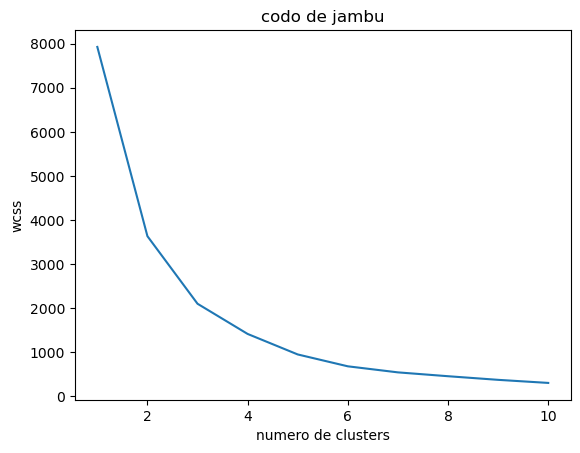

In [11]:
plt.plot(range (1,11), wcss)
plt.title("codo de jambu")
plt.xlabel("numero de clusters")
plt.ylabel("wcss")
plt.show()

In [12]:
clustering=KMeans(n_clusters=3, max_iter=300)
clustering.fit(df_norm)

KMeans(n_clusters=3)

In [13]:
df["KMeans_clusters"]=clustering.labels_
df.head()

open  close  low  high   volume  KMeans_clusters
0   123    125  122   126  2163600                2
1   125    119  119   125  2386400                2
2   116    114  114   119  2489500                2
3   115    116  113   117  2006300                2
4   117    114  114   117  1408600                2

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(df_norm)
pca_df_df=pd.DataFrame(data = pca_df, columns =['componente_1', 'componente_2'])
pca_nombres_df = pd.concat([pca_df_df, df[['KMeans_clusters']]], axis=1)

pca_nombres_df

componente_1  componente_2  KMeans_clusters
0           0.075526     -0.002220                2
1           0.072960     -0.002011                2
2           0.065046     -0.002056                2
3           0.064429     -0.002632                2
4           0.064764     -0.003321                2
...              ...           ...              ...
851259      0.048619     -0.004163                2
851260     -0.027507     -0.004614                0
851261     -0.014492     -0.004622                0
851262     -0.025272     -0.005217                0
851263     -0.013842     -0.005766                0

[851264 rows x 3 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

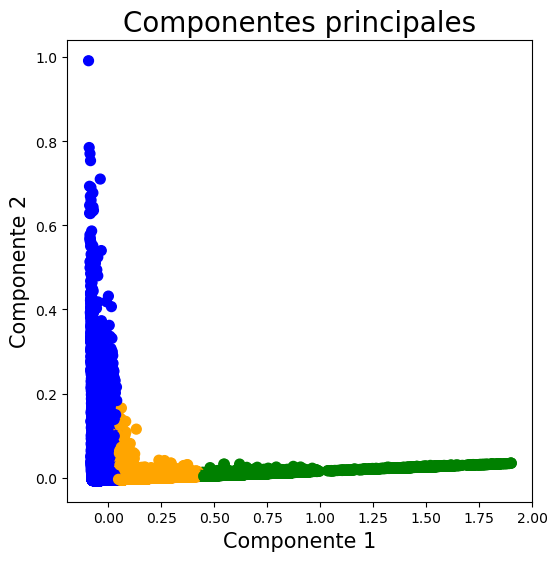

In [23]:
fig=plt.figure(figsize =(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes principales', fontsize = 20)

color_theme = np.array(("blue", "green", "orange"))
ax.scatter(x = pca_nombres_df.componente_1, y = pca_nombres_df.componente_2, 
          c = color_theme[pca_nombres_df.KMeans_clusters], s=50)
plt.show